# Roots of equations

Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

**Reminders**: 
* All your figures and plot must be self-explanatory: label the axes, print a legend, write comments.
* Transparent use of AI tools: remember to write a brief sentence if and how you used AI tools in these exercises.


Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR COMMENTS HERE`, as well as your name and collaborators below:

In [34]:
GROUP_NR = "23"
NAMES = "Carl Örnberg"
DATE = "2024-03-27"

### Statement on individual contributions

In LP4 we introduce a new section to each assignment where we ask groups of more than 1 person to write a few sentences on the contribution from each person in the group. This is to understand how the different groups operate and to also help on self-reflection of how you conduct group work.

The statement does not need to explain contributions to each problem separately, it is up to your group to decide what to write in it.

An example: 
In problem X it was Alice's idea to fit the data using curve_fit.
Bob and Alice tried different routines separately and merged their answers in the end for problem Y.

In [35]:
# YOUR STATEMENT HERE
#In problem 1 we both agreed to define a function for the Newton method specifically and then plot the guesses. Carl did the second problem as he read
#the pages in the book about the eigenvalue approach. In problem 3 Jonathan mostly came up with the bisection function, and how you only needed
#to change one interval in one iteration. 
#Problem 4 we both tested a lot of options and cooperated very closely as it was a really hard exercise. Finally Jonathan plotted the different plots in a) and b)
#and Carl came up with the gradient ascent and descent functions
#Overall a really good teamwork with the assignment. 

### Summary of assignment

In this assignment you will:
- implement different approaches to solving for the roots of 1d functions
- compare and contrast different methods that exist for root-finding
- implement a method for finding maxima of a 2-d function

## Problem 1: Roots of polynomials I - Newton-Raphson method

Consider the sixth-order polynomial
\begin{equation}
P(x) = 924 x^6 - 2772 x^5 + 3150 x^4 - 1680 x^3 + 420 x^2 - 42 x + 1.
\end{equation}
There is no general formula for the roots of a sixth-order polynomial, but one can find them easily enough using numerical methods as discussed in the lecture. 

**Task 1**: Make a function that evaluates $P(x)$ and its analytical derivative. Plot $P(x)$ from $x=0$ to $x=1$. Inspect the plot and find rough values for the six roots of the polynomial, the points at which the function is zero. Put the initial estimates of the roots in an array.

**Task 2**: Write a Python program to solve for the positions of all six roots to at least ten decimal places of accuracy using Newton's method. Use the absolute difference between successive values as your error. Save an array with solutions in the variable `sol` for answer checking (it should be close to [0.03, 0.17, 0.38, 0.62, 0.83, 0.97]).

**Task 3**: Plot the starting guess/initial estimates of the roots and the final values of the roots in the same figure as $P(x)$.

Follow the steps below when making this exercise.
* First test that your function and derivative definition are correct
* Solve this problem for a single root
* Subsequently add a for loop to find all roots

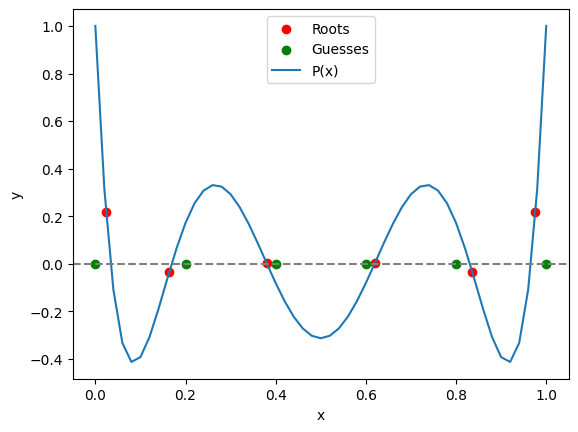

In [36]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt

def P(x):
    return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1

def P_prime(x):
    return 6*924*x**5 - 5*2772*x**4 + 4*3150*x**3 - 3*1680*x**2 + 2*420*x - 42

x = np.arange(0, 1.02, 0.02)



def Newtons_method_P(guess, tol):
    """Function that takes some guesses for roots and then approximates it with Newtons method
    Input - guess = a list of guesses of root
          - tol = the tolerance of convergence
    Return - a list of aproximatet roots
    """
    roots = []
    for i in range(len(guess)):
        x0 = guess[i]
        x1 = x0 - P(x0)/P_prime(x0)
        while abs(P(x1))<tol:
            x0, x1 = x1, x0 - P(x0)/P_prime(x0)
        roots.append(x1)
    return roots

guess = [0, 0.2, 0.4, 0.6, 0.8, 1]
tol = 10e-10
roots = np.array([Newtons_method_P(guess, tol)])
plt.scatter(roots, P(roots), color="red", label="Roots") 
plt.scatter(guess, [0 for i in range(len(guess))], color="green", label="Guesses")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, P(x), label="P(x)")
plt.axhline(y=0, linestyle="--", color="grey")
plt.legend()
plt.show()





## Problem 2: Roots of polynomials II - Eigenvalue approach

In Exercise 1, the roots of the polynomial were solved by starting with educated guesses close to the six roots. It is also possible to calculate all six roots using an Eigenvalue approach. Follow these steps:

**Task 1**: First define the 'companion matrix' as defined in the lecture. (Hint: remember that you should rewrite the polynomial so that the coefficient of the highest term (so of $x^6$) is $1$).

**Task 2**: Use the methods (and/or python tools) you learned during the section on Eigenvalues and Eigenvectos to calculate the eigevalues of this matrix. This will give you the roots.

**Task 3**: Compare the results with the roots you found in Exercise 2.

In [37]:
# YOUR CODE HERE
A = np.zeros((6, 6))
coef = [1/924, -42/924, 420/924, -1680/924, 3150/924, -2772/924]
for i in range(0, 6):
    A[5,i] = -coef[i]
    for j in range(0, 6):
        if i == j-1:
            A[i, j] = 1
roots_eig, eig_vec = np.linalg.eig(A)

print("Roots from Newtons method {}, roots from eigenvalues approach {}".format(roots, roots_eig))


Roots from Newtons method [[0.02380952 0.16413232 0.38008227 0.61991773 0.83586768 0.97619048]], roots from eigenvalues approach [0.96623476 0.83060469 0.61930959 0.38069041 0.16939531 0.03376524]


## Problem 3: Finding roots of generic non-linear 1d equations - application to static equilibrium of a mechanical system

Two springs are fixed to the ceiling with a mass suspended between them as shown here:
![image](springs.png)

The goal of the calculation is to find the value for the angle $\theta$ at which this system (with identical) springs is in equilibrium. Using the root finding methods from the lecture, you should aim to calculate this with an accuracy of $\epsilon=10^{-4}$ degrees. This problem does not have an analytical solution.

We use the following values:
\begin{align*}
m &= 5\,\mathrm{kg}, \\
L_0 &= 0.3\,\mathrm{m}, \\
K &= 1\times 10^3\,\mathrm{N}\,\mathrm{m}^{-1}, \\
g &= 9.81\,\mathrm{m}\,\mathrm{s}^{-2}.
\end{align*}
$m$ is the mass of the object

$L_0$ is half the length between the two points where the springs are attached, and is equal to their natural length

$K$ is the spring constant (the same for each spring)

$g$ is the acceleration due to gravity.

The equilibrium angle $\theta^*$ can then be calculated from:
\begin{equation}
f(\theta^*) = \tan(\theta^*) - \sin(\theta^*) - {mg\over(2KL_0)} = 0.
\end{equation}

### 3a: bisection method

**Task 1**: Define a function that takes as input the angle $\theta$ and evaluates the function $f(\theta)$.

**Task 2**: Define a function that performs the bisection method and prints out the number of iterations that are needed to reach the desired accuracy. Incorporate a check that the root is indeed in the starting interval, otherwise print out a warning message and return a NaN value. Use comments in your code to explain what it does.

**Task 3**: Plot the function whose roots you wish to determine using a range of $\theta$ values that are relevant to the problem. Find a suitable starting interval for the calculation. 

**Task 4**: Apply the bisection method to find the root.

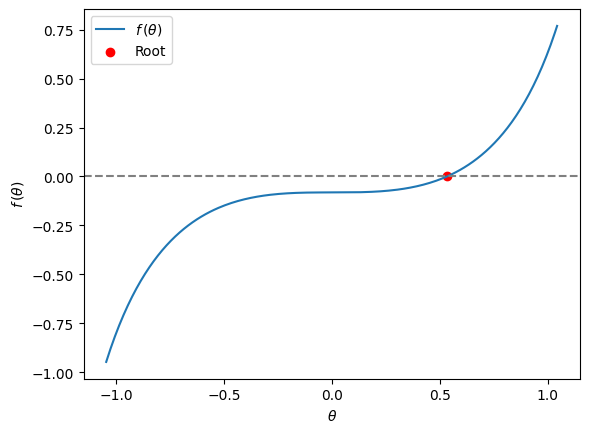

In [38]:
# YOUR CODE HERE
def f(theta):
    m, L, K, g = 5, 0.3, 10**3, 9.81 
    return np.tan(theta) - np.sin(theta) - m*g / (2*K*L)

def bisection(f,interval, tol):
    count = 0
    x1, x2 = interval[0], interval[1] #settig x0 and x1 to the ends of the interval
    while abs(x2-x1) > tol: #Running the program until the interval is close enough
        x3 = (x1+x2)/2 #midpoint of interval
        if f(x3)*f(x1) < 0:
            x2 = x3  #new interval because the function is of opposite sign at the endpoints
        else:
            x1 = x3 #interval that the roots in if the functions have the same sign
        count += 1
    return (x1 + x2)/2, count

interval=[0,1]
tol = 10e-7
root_b, count = bisection(f, interval, tol)

theta = np.arange(-np.pi/3, np.pi/3, 0.01)
plt.plot(theta, f(theta), label=r"$f\,(\theta)$")
plt.scatter(root_b, f(root_b), label="Root", color="red")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$f\,(\theta)$")
plt.axhline(y=0, linestyle="--", color="grey")
plt.legend()
plt.show()




### 3b: Newton-Raphson method

**Task 1**: Define a python function that performs the Newton-Raphson method and prints out the number of iterations needed to reach the desired accuracy.

**Task 2**: Define a function that evaluates the analytical derivative of the function whose roots you wish to find.

**Task 3**: Plot the analytical derivative of the function whose roots you wish to find.

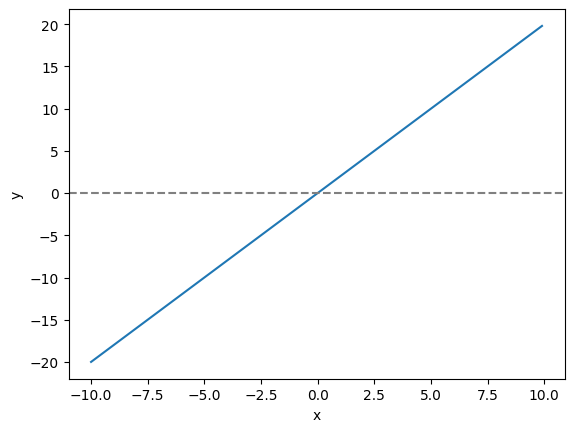

In [39]:
# YOUR CODE HERE
def Newtons_method_count(P, P_prime, guess, tol):
    """Function that takes some guesses for roots and then approximates it with Newtons method
    Input - P = the function
          - the derivative of the function
          - guess = a list of guesses of root
          - tol = the tolerance of convergence
    Return - a list of aproximatet roots
           - How many times the algorithm run during each root
    """

    roots = []
    counts = [0 for i in range(len(guess))]
    for i in range(len(guess)):
        x0 = guess[i]
        x1 = x0 - P(x0)/P_prime(x0)
        while abs(P(x1))>=tol:
            x0, x1 = x1, x0 - P(x0)/P_prime(x0)
            counts[i] += 1
        roots.append(x1)
    return roots, counts

def g(x):
    return x**2 - 1

def g_prime(x):
    return 2*x

x = np.arange(-10, 10, 0.1)
plt.plot(x, g_prime(x))
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(y=0, linestyle="--", color="grey")
plt.show()



### 3c: Which method, when?

Based on your results from above, comment on the differences you see between the two methods. Write 1-2 sentences explaining: 

a) why did the two methods behave differently?

b) if you were to choose one method to solve the problem here, which one would it be and why?

c) in what kind of problem would you prefer to choose the other method?

In [40]:
# YOUR COMMENTS HERE
#a) They rely on different techniques, the Newton method uses derivatives and uses a form of linearisation but the bisection method just check signs of the function in an interval
#where the function should cross if it is a continious function. Also, the Newton method converges faster as it converges quadraticly and the bisection method converges linear.

#b) It would be Newtons method since it is easier to just guess a root and it will more likely than not find a root, but the bisection has to run many times if it's a big interval
#and you need to define an interval. And like we said in a) it converges faster.

#c)Of course if the function is not differentiable or if it has many sharp turns which makes the changes of the derivatives drasticly the bisection would be recomended, but if
#it is a smoot regulary behaved elemenetary function, I would choose Newtons method, since it would converge quicker and be easier to guess.

### 3d: Using fsolve and comparing

Finally, find the root with ```scipy.optimize.fsolve```.

Compare your results from all 3 methods and comment on what you find.

In [55]:
from scipy.optimize import fsolve

root_fsolve = fsolve(f, 0.3)

def f_prime(theta):
    return 1/((np.cos(theta))**2) - np.cos(theta)

root_N, count = Newtons_method_count(f, f_prime, [0.3], 10e-10)


print("Root from fsolve {}, root from bisection {}, root from Newtons method {}".format(root_fsolve, root_b, root_N)) #root_b comes from 3a)

# YOUR CODE & COMMENTS HERE

Root from fsolve [0.53282627], root from bisection 0.5328259468078613, root from Newtons method [0.5328262692641106]


## Problem 4. Finding critical points of multivariable functions: Lagrange points around a planet-Sun system

**Goal**: Tackle a 2D minimization problem and understand the of gradient descent. We will apply a variant of the gradient descent method and to locate two maxima of the potential energy of a Sun-planet-satellite system. 

In short these are equilibrium points where small objects can rotate around the system's center of mass with the same period as the planet.

**Background**: The general problem of finding the motion of 3 bodies under the influence of gravity does not have a closed-form solution(a.k.a. the 3-body problem https://en.wikipedia.org/wiki/Three-body_problem ). 
However, if one imposes some restrictions on the orbits and masses of the bodies, the problem becomes tractable analytically.

In this exercise we look at the circular restricted three-body problem in which the orbits are restricted to circles and the mass of the third body is restricted to be much smaller than the other two. The system of the Sun, Earth and a satellite is a good example of such a case. The satellite’s motion is influenced by the gravitational pulls of both the Sun and the planet, leading to a finite number of locations where the satellite can retain a circular orbit around the Sun with the same period as the Earth. These points are known as Lagrange points https://en.wikipedia.org/wiki/Lagrange_point .


The potential energy equation we use is taken from the following reference, along with a more extended discussion of the Physics of the problem:
https://leancrew.com/all-this/2016/08/lagrange-points-redux/

Below is a diagram showing the positions of the three bodies in a reference frame chosen so that it rotates with the planet and sun around the barycenter and the coordinates have been transformed to not have units (this is handy to not deal with the very large values for e.g. the masses of the Sun and planet).

![image](Nondimensional_coordinate_system_annotated_sm.png)


### 4a: Visualizing the potential energy - #1


The potential energy of the system is given by the function:

$ U = -\frac{1-\mu}{\sqrt{(\xi + \mu)^2 + \eta^2}} - \frac{\mu}{\sqrt{\xi - (1-\mu)^2 + \eta^2}} - \frac{1}{2} (\xi^2 + \eta^2) $

Task 1: Run the following code block to visualize the potential energy.

Task 2: Change the values of $\mu$ to see how the potential energy changes shape. Show two plots for different values of mu that you found interesting and explain why you chose those.

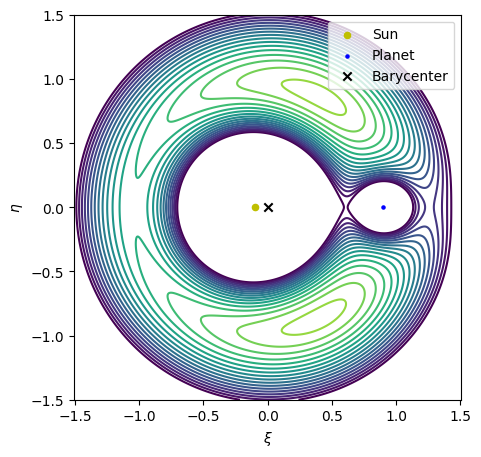

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


N = 1000

# Make a grid of the nondimensional coordinates, we'll call them x and y
x, y = np.meshgrid(np.linspace(-1.5, 1.5, N), np.linspace(-1.5, 1.5, N))


def potential(xy,mu=0.1):
    '''
    Compute the potential energy at point xy = x,y.
    Input: xy - two coordinates at which you wish to evaluate the potential energy (tuple)
           mu - parameter describing the ratio between the planet and sun mass (default = 0.1)
    Output: u - the value of the potential energy (float)
    '''
    x,y = xy
        
    term1 = -(1-mu) / ((x + mu)**2 + y**2)**0.5
    term2 = -mu / ((x - (1-mu))**2 + y**2)**0.5
    term3 = -0.5 * (x**2 + y**2)
    u = term1 + term2 + term3
    
    return u

# Choose a value for the ratio between the mass of the planet and the Sun
mu = 0.1

# Call the function to evaluate the potential in the grid
u = potential((x,y),mu=mu)


# Define some locations for plotting
R = 1
sun_pos = np.array([-mu*R, 0]) # sun position
planet_pos = np.array([(1-mu)*R, 0]) # planet position


# Plot the potential as contours
plt.figure(figsize=(5, 5))
levels = np.linspace(-1.8, -1.4, 20)
plt.contour(x, y, u, levels=levels)
plt.scatter([sun_pos[0]], [sun_pos[1]], c='y', s=20, label = 'Sun')
plt.scatter([planet_pos[0]], [planet_pos[1]], c='b', s=5, label = 'Planet')
plt.scatter([0], [0], c='k', marker='x', label = 'Barycenter')
plt.legend()
plt.axis('equal')
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\eta$')
plt.show()

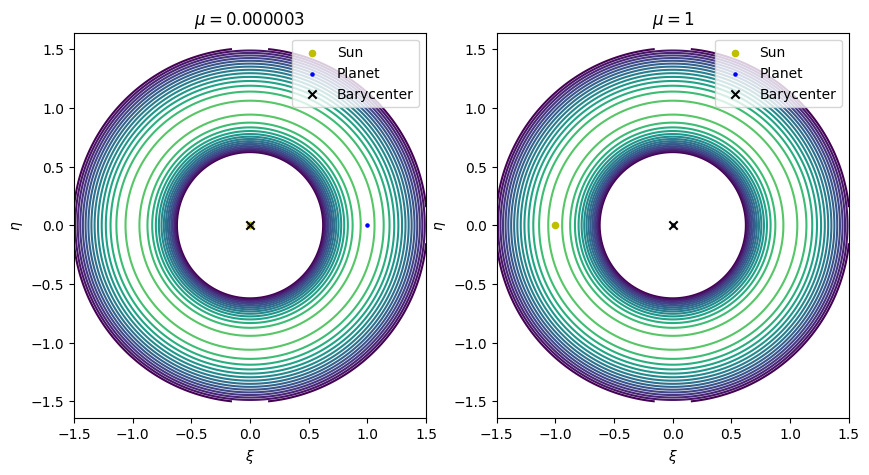

In [53]:
mu1 = 0.000003
mu2 = 1

u1 = potential((x,y),mu1)
u2 = potential((x,y), mu2)


# Define some locations for plotting
R = 1
sun_pos = np.array([-mu1*R, 0]) # sun position
planet_pos = np.array([(1-mu1)*R, 0]) # planet position


# Plot the potential as contours
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
levels = np.linspace(-1.8, -1.4, 20)

plt.contour(x, y, u1, levels=levels)
plt.scatter([sun_pos[0]], [sun_pos[1]], c='y', s=20, label = 'Sun')
plt.scatter([planet_pos[0]], [planet_pos[1]], c='b', s=5, label = 'Planet')
plt.scatter([0], [0], c='k', marker='x', label = 'Barycenter')
plt.title(r"$\mu = 0.000003$")
plt.axis('equal')
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\eta$')
plt.legend()

plt.subplot(1, 2, 2)

R = 1
sun_pos = np.array([-mu2*R, 0]) # sun position
planet_pos = np.array([(1-mu2)*R, 0]) # planet position

plt.contour(x, y, u2, levels=levels)
plt.scatter([sun_pos[0]], [sun_pos[1]], c='y', s=20, label = 'Sun')
plt.scatter([planet_pos[0]], [planet_pos[1]], c='b', s=5, label = 'Planet')
plt.scatter([0], [0], c='k', marker='x', label = 'Barycenter')
plt.title(r"$\mu = 1$")

plt.legend()
plt.axis('equal')
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\eta$')
plt.show()

#We choose mu=000003 because this is the actual relationship between the sun and the earth masses and mu=1 because this is what would happened
#if the earth and the sun had equal masses.

### 4b: Visualize the potential energy - #2

Task 1: Create a 3D plot and use matplotlib's `plot_surface` to display the potential energy for $\mu = 0.1$ as a surface, where the z axis holds the values of the potential energy.

Task 2: Recreate the same plot, but use limits for the z axis between -2.4 and -1.8 to zoom in.

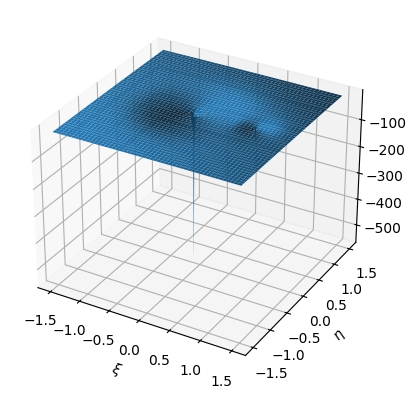

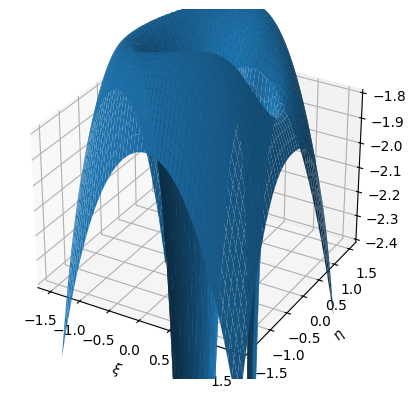

In [45]:
# YOUR CODE HERE
mu = 0.1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, u)
ax.set_xlabel(r"$\xi$")
ax.set_ylabel(r"$\eta$")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, u)

ax.set_xlabel(r"$\xi$")
ax.set_ylabel(r"$\eta$")
ax.set_zlim(-2.4, -1.8)
plt.show()




### 4c: Gradient ascent.

**Goal**: Apply a variation of gradient descent to find the two large maxima of the potential - a.k.a. Lagrange points 4, 5.

**Background**: Gradient descent is a generic method for finding minima of a multivariable function $f$. It follows a simple prescription: 

$ x^{(k)} = x^{(k-1)} - \gamma \nabla f(x^{(k-1)})$,

where $x^{(k)}$ is the estimate of the function's minimum at the current iteration and $x^{(k-1)}$ is that in the previous iteration, $\nabla f$ denotes the multi-dimensional gradient of $f$ and $\gamma$ is a parameter that you tweak according to the needs of the problem. In this notation, $x$ are vectors.


**Task 1**: Define a function `gradient` that computes the gradient of the function `potential`. You can use any method you like from the ones in the Differentiation section, but prefer methods that require fewer function evaluations. The function should take as input the `potential` function, a tuple/array of coordinates where the gradient is to be evaluated, a keyword for the step size needed for the gradient calculation and any other keyword arguments you think are needed.

Implement two criteria to stop: 
- $|\frac{x^{(k)} - x^{(k-1)}}{x^{(k-1)}}| < \epsilon$, where $\epsilon$ is a tolerance that is passed to the function as a keyword argument.
- if the estimate of the minimum exceeds the domain of interest, i.e. $|\xi| > 1.5$ or $|\eta| > 1.5$ exit the calculation and return NaN. 

Hint: Remember the function must compute a multi-dimensional gradient. If you choose to implement forward differences for example, you can choose the second point you need as (x+h,y+h), where h is the step size.

**Task 2**: Select 3 different starting positions within the area $|\eta| < 1.5$, $|\xi| < 1.5$ that are fairly distant apart from each other and demonstrate at which points the gradient descent ends up in. Explain whether this behavior is expected.

**Task 3**: Write code that performs gradient ascent: i.e. follows the gradient towards the maxima instead of goind towards the minima. You can modify your gradient descent function or choose a different way. Write the function so that it returns the final point and every point in the iteration.

**Task 4**: Apply gradient ascent to find the two Lagrange points where the potential is maximum for $\mu = 0.1$. You should find answers close to: (0.400, 0.866) and (0.400, -0.866). 

Hint: You will need to play a bit with the step size of the gradient calculation, the starting points, the $\gamma$ parameter and the tolerance you allow for convergence.

**Task 5**: Plot the returned positions from every iteration on the contour plot from before to show how the method finds each maximum.

Hint: It may help if you zoom in to the part of the potential that is relevant for your calculation to better see the individual points.

In [57]:

# YOUR CODE HERE
#Task 1
def gradient(potential, coord, stepsize=0.001):
    """Function that computes the gradient in a vector
    Input - potential - the function of which the gradient is calculated
          - coord - the coordinates (list)
          - stepsize - the size of the step to compute the derivative (default 0.01)
          
    """
    f0 = potential(coord)
    coord_change = coord.copy()
    grad = []

    for i in range(len(coord)):
        coord_change[i] += stepsize
        fh = potential(coord_change)
        dfdxi = (fh-f0)/stepsize
        grad.append(dfdxi)
        coord_change = coord.copy()

    return np.array(grad)

def grad_descent(potential, gradient, start, gamma, tol=10e-5):
    """Function that computes the gradient descent 
    Input - potential - some function
          - gradient - the gradient of the function
          - start - the starting coordinates
          - gamma - some scalar depending on the function
          - tol - tolerance of convergence (default=10e-7)
    Output - local minimum
    """
    x0 = np.array(start)
    x1 = x0 - gamma*gradient(potential, start)
    while np.linalg.norm(x1-x0)/np.linalg.norm(x0) > tol:
        x0 = x1
        x1 = x0 - gamma*gradient(potential,x0)
        if abs(x1[0]) > 1.5 or abs(x1[1]) > 1.5:
            return None
    return x1
    
#Task 2
print(grad_descent(potential, gradient, [0.1, 0.1], 0.1))
print(grad_descent(potential, gradient, [1, 0.1], 0.1))
print(grad_descent(potential, gradient, [-1, -1], 0.1))

#All of the tests does not find a minimum simply because there is no minimum. The derivative goes to infinity at some places and therefore the gradient
#becomes very large and the points end up outside 1.5

#Task 3

def grad_ascent(potential, gradient, start, gamma, tol=10e-4):
    """Function that computes the gradient descent 
    Input - potential - some function
          - gradient - the gradient of the function
          - start - the starting coordinates
          - gamma - some scalar depending on the function
          - tol - tolerance of convergence (default=10e-7)
    Output - local minimum
    """
    points = []
    x0 = np.array(start)
    x1 = x0 + gamma*gradient(potential, start)
    while np.linalg.norm(x1-x0)/np.linalg.norm(x0) > tol:
        x0 = x1
        x1 = x0 + gamma*gradient(potential,x0)
        points.append(x1)
        if abs(x1[0]) > 1.5 or abs(x1[1]) > 1.5:
            return None
    return x1, points

min_1, points = grad_ascent(potential, gradient, [0.5, 0.9], 0.4)
min_2, points = grad_ascent(potential, gradient, [0.5, -0.9], 0.4)
print("The potential function has its maximum at points {} and {}".format(min_1, min_2))

None
None
None
The potential function has its maximum at points [0.40871682 0.86104099] and [ 0.40478448 -0.86389397]


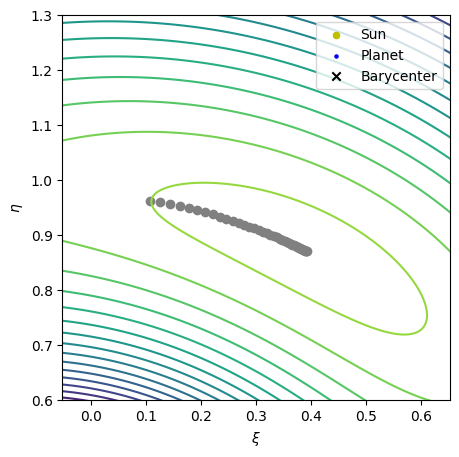

In [ ]:
#Task 5
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


N = 1000

# Make a grid of the nondimensional coordinates, we'll call them x and y
x, y = np.meshgrid(np.linspace(-1.5, 1.5, N), np.linspace(-1.5, 1.5, N))


def potential(xy,mu=0.1):
    '''
    Compute the potential energy at point xy = x,y.
    Input: xy - two coordinates at which you wish to evaluate the potential energy (tuple)
           mu - parameter describing the ratio between the planet and sun mass (default = 0.1)
    Output: u - the value of the potential energy (float)
    '''
    x,y = xy
        
    term1 = -(1-mu) / ((x + mu)**2 + y**2)**0.5
    term2 = -mu / ((x - (1-mu))**2 + y**2)**0.5
    term3 = -0.5 * (x**2 + y**2)
    u = term1 + term2 + term3
    
    return u

# Choose a value for the ratio between the mass of the planet and the Sun
mu = 0.1

# Call the function to evaluate the potential in the grid
u = potential((x,y),mu=mu)


# Define some locations for plotting
R = 1
sun_pos = np.array([-mu*R, 0]) # sun position
planet_pos = np.array([(1-mu)*R, 0]) # planet position


# Plot the potential as contours
plt.figure(figsize=(5, 5))
levels = np.linspace(-1.8, -1.4, 20)
plt.contour(x, y, u, levels=levels)
plt.scatter([sun_pos[0]], [sun_pos[1]], c='y', s=20, label = 'Sun')
plt.scatter([planet_pos[0]], [planet_pos[1]], c='b', s=5, label = 'Planet')
plt.scatter([0], [0], c='k', marker='x', label = 'Barycenter')
plt.legend()
plt.axis('equal')
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\eta$')

min, point = grad_ascent(potential, gradient, [0.1, 1.2], 0.4)
for i in range(len(point)):
    plt.scatter(point[i][0], point[i][1], color="grey", label="Points from ascent")

plt.xlim(0, 0.6)
plt.ylim(0.6, 1.3)
plt.show()